In [17]:
%matplotlib notebook
%matplotlib inline

In [18]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# csv to DataFrame
initial_data = pd.read_csv('social-influence-on-shopping.csv')
initial_data.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


In [20]:
# 'Question' is the same throughout, so let's drop it
initial_data.drop(['Question'], axis=1, inplace=True)
initial_data.drop(['Segment Type'], axis=1, inplace=True)
initial_data.head()

,Segment Description,Answer,Count,Percentage
0,Global results,Facebook,548,0.205
1,Global results,Instagram,916,0.342
2,Global results,Snapchat,86,0.032
3,Global results,Twitter,179,0.067
4,Global results,None,947,0.354


In [21]:
categories = initial_data.groupby('Segment Description')
count_categories = categories['Segment Description'].count()
count_categories

Segment Description
Appalachian State University                       5
Arbroath Academy                                   5
Are you a? SVB team member                         5
Are you a? Student Trekker                         5
Are you single? No                                 5
                                                  ..
your zodiac sign? Pisces (Feb 19 - Mar 20)         5
your zodiac sign? Sagittarius (Nov 22 - Dec 21)    5
your zodiac sign? Scorpio (Oct 23 - Nov 21)        5
your zodiac sign? Taurus (Apr 20 - May 20)         5
your zodiac sign? Virgo (Aug 23 - Sep 22)          5
Name: Segment Description, Length: 289, dtype: int64

In [22]:
# overview
overview_df = pd.DataFrame(initial_data.iloc[0:5, :])
overview_df

,Segment Description,Answer,Count,Percentage
0,Global results,Facebook,548,0.205
1,Global results,Instagram,916,0.342
2,Global results,Snapchat,86,0.032
3,Global results,Twitter,179,0.067
4,Global results,None,947,0.354


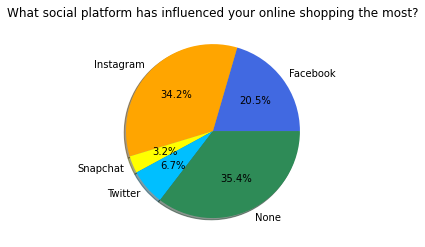

In [25]:
# pie chart

labels = overview_df['Answer']
sizes = overview_df['Percentage']
colors = ["royalblue", "orange", "yellow", "deepskyblue", "seagreen"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("What social platform has influenced your online shopping the most?")
plt.show()

In [26]:
# save pie
plt.savefig("overview.png")

<Figure size 432x288 with 0 Axes>

In [27]:
# by gender - f/m
gender_f = pd.DataFrame(initial_data.iloc[10:15, :3])
gender_m = pd.DataFrame(initial_data.iloc[15:20, :3])
gender_merge = pd.merge(gender_f, gender_m, on="Answer", how="outer")
gender_merge = gender_merge.rename(columns={"Count_x":"Count (Female Voters)", "Count_y":"Count (Male Voters)"})
gender_merge

,Segment Description_x,Answer,Count (Female Voters),Segment Description_y,Count (Male Voters)
0,Female voters,Facebook,222,Male voters,326
1,Female voters,Instagram,535,Male voters,380
2,Female voters,Snapchat,29,Male voters,56
3,Female voters,Twitter,57,Male voters,122
4,Female voters,None,271,Male voters,678


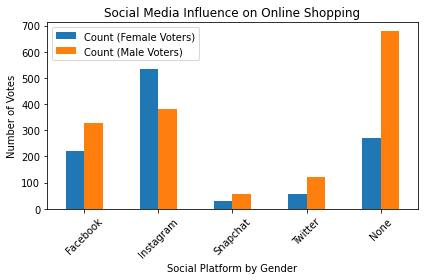

In [28]:
# bar graph - multi plot, if possible
multi_plot = gender_merge.plot(kind="bar")
multi_plot.set_xticklabels(gender_merge["Answer"], rotation=45)
plt.title("Social Media Influence on Online Shopping")
plt.xlabel("Social Platform by Gender")
plt.ylabel("Number of Votes")
plt.tight_layout()

In [ ]:
# save figure
plt.savefig("gender_bar2.png")

In [29]:
# income of parents
upper_class = pd.DataFrame(initial_data.iloc[915:920, :3])
upper_middle = pd.DataFrame(initial_data.iloc[920:925, :3])
middle_class = pd.DataFrame(initial_data.iloc[925:930, :3])
lower_class = pd.DataFrame(initial_data.iloc[930:935, :3])

# getting counts
upper_counts = upper_class['Count'].sum()
upper_middle_counts = upper_middle['Count'].sum()
middle_counts = middle_class['Count'].sum()
lower_counts = lower_class['Count'].sum()

income_summary = [upper_counts, upper_middle_counts, middle_counts, lower_counts]
income_summary

[304, 451, 340, 134]

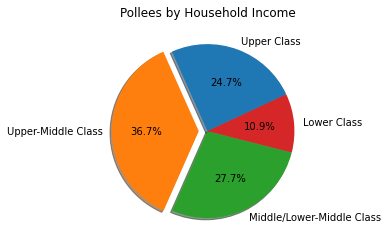

In [30]:
# pie chart
labels = ['Upper Class', 'Upper-Middle Class', 'Middle/Lower-Middle Class', 'Lower Class']
sizes = income_summary
explode = [0, 0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=25)
plt.title("Pollees by Household Income")
plt.show()

In [10]:
# save fig
plt.savefig("incomes_pie.png")

In [31]:
# ethnicities - individual
ethnicity_asian = pd.DataFrame(initial_data.iloc[970:975, :3])
ethnicity_black = pd.DataFrame(initial_data.iloc[1215:1220, :3])
ethnicity_hispanic = pd.DataFrame(initial_data.iloc[1350: 1355, :3])
ethnicity_white = pd.DataFrame(initial_data.iloc[1440:1445, :3])
ethnicity_other = pd.DataFrame(initial_data.iloc[1170:1175, :3])
ethnicity_native_american = pd.DataFrame(initial_data.iloc[1175:1180, :3])

# collecting counts
asian_sum = ethnicity_asian['Count'].sum()
black_sum = ethnicity_black['Count'].sum()
hispanic_sum = ethnicity_hispanic['Count'].sum()
white_sum = ethnicity_white['Count'].sum() 
other_sum = ethnicity_other['Count'].sum() + ethnicity_native_american['Count'].sum()

ethnicity_summary = [asian_sum, black_sum, hispanic_sum, white_sum, other_sum]
ethnicity_summary

[192, 94, 113, 1572, 105]

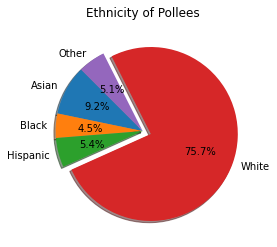

In [32]:
# ethnicity pie chart
labels = ["Asian", "Black", "Hispanic", "White", "Other"]
sizes = ethnicity_summary
explode = [0, 0, 0, 0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("Ethnicity of Pollees")
plt.show()

In [ ]:
# save figure
plt.savefig("ethnicities_pie.png")